# TensofrFlow Templates ans some examples

### Example 1: Auto Encoder Example.
Using an auto encoder on MNIST handwritten digits.

In [3]:
from __future__ import division, print_function, absolute_import

In [6]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
# Import MINST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data", one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data\train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


In [8]:
# Parameters
learning_rate = 0.01
training_epochs = 20
batch_size = 256
display_step = 1
examples_to_show = 10

# Network Parameters
n_hidden_1 = 256 # 1st layer num features
n_hidden_2 = 128 # 2nd layer num features
n_input = 784 # MNIST data input (img shape: 28*28)

# tf Graph input (only pictures)
X = tf.placeholder("float", [None, n_input])

weights = {
    'encoder_h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'encoder_h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'decoder_h1': tf.Variable(tf.random_normal([n_hidden_2, n_hidden_1])),
    'decoder_h2': tf.Variable(tf.random_normal([n_hidden_1, n_input])),
}
biases = {
    'encoder_b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'encoder_b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'decoder_b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'decoder_b2': tf.Variable(tf.random_normal([n_input])),
}

In [9]:
# Building the encoder
def encoder(x):
    # Encoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['encoder_h1']),
                                   biases['encoder_b1']))
    # Encoder Hidden layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['encoder_h2']),
                                   biases['encoder_b2']))
    return layer_2


# Building the decoder
def decoder(x):
    # Decoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['decoder_h1']),
                                   biases['decoder_b1']))
    # Decoder Hidden layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['decoder_h2']),
                                   biases['decoder_b2']))
    return layer_2

# Construct model
encoder_op = encoder(X)
decoder_op = decoder(encoder_op)

# Prediction
y_pred = decoder_op
# Targets (Labels) are the input data.
y_true = X

# Define loss and optimizer, minimize the squared error
cost = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(cost)

# Initializing the variables
init = tf.global_variables_initializer()

Epoch: 0001 cost= 0.211001784
Epoch: 0002 cost= 0.173644319
Epoch: 0003 cost= 0.159305394
Epoch: 0004 cost= 0.145555928
Epoch: 0005 cost= 0.138054445
Epoch: 0006 cost= 0.130843505
Epoch: 0007 cost= 0.125162423
Epoch: 0008 cost= 0.121515900
Epoch: 0009 cost= 0.120353736
Epoch: 0010 cost= 0.120584331
Epoch: 0011 cost= 0.115231797
Epoch: 0012 cost= 0.113475107
Epoch: 0013 cost= 0.108184233
Epoch: 0014 cost= 0.107436240
Epoch: 0015 cost= 0.103374138
Epoch: 0016 cost= 0.100491576
Epoch: 0017 cost= 0.099182658
Epoch: 0018 cost= 0.097760513
Epoch: 0019 cost= 0.099423610
Epoch: 0020 cost= 0.094678871
Optimization Finished!


C:\Users\khalil\Anaconda3\lib\site-packages\matplotlib\figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


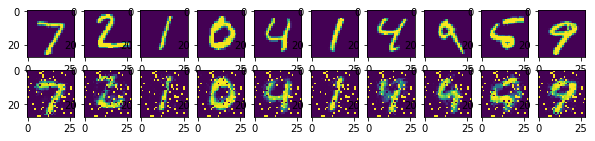

In [10]:
# Launch the graph
# Using InteractiveSession (more convenient while using Notebooks)
sess = tf.InteractiveSession()
sess.run(init)

total_batch = int(mnist.train.num_examples/batch_size)
# Training cycle
for epoch in range(training_epochs):
    # Loop over all batches
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        # Run optimization op (backprop) and cost op (to get loss value)
        _, c = sess.run([optimizer, cost], feed_dict={X: batch_xs})
    # Display logs per epoch step
    if epoch % display_step == 0:
        print("Epoch:", '%04d' % (epoch+1),
              "cost=", "{:.9f}".format(c))

print("Optimization Finished!")

# Applying encode and decode over test set
encode_decode = sess.run(
    y_pred, feed_dict={X: mnist.test.images[:examples_to_show]})
# Compare original images with their reconstructions
f, a = plt.subplots(2, 10, figsize=(10, 2))
for i in range(examples_to_show):
    a[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
    a[1][i].imshow(np.reshape(encode_decode[i], (28, 28)))
f.show()
plt.draw()
plt.show()

### Example 2: A Convolutional Network implementation example.
This example is using the MNIST database of handwritten digits

In [11]:
import tensorflow as tf

# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [12]:
# Parameters
learning_rate = 0.001
training_iters = 200000
batch_size = 128
display_step = 10

# Network Parameters
n_input = 784 # MNIST data input (img shape: 28*28)
n_classes = 10 # MNIST total classes (0-9 digits)
dropout = 0.75 # Dropout, probability to keep units

# tf Graph input
x = tf.placeholder(tf.float32, [None, n_input])
y = tf.placeholder(tf.float32, [None, n_classes])
keep_prob = tf.placeholder(tf.float32) #dropout (keep probability)

In [13]:
# Create some wrappers for simplicity
def conv2d(x, W, b, strides=1):
    # Conv2D wrapper, with bias and relu activation
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)


def maxpool2d(x, k=2):
    # MaxPool2D wrapper
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1],
                          padding='SAME')


# Create model
def conv_net(x, weights, biases, dropout):
    # Reshape input picture
    x = tf.reshape(x, shape=[-1, 28, 28, 1])

    # Convolution Layer
    conv1 = conv2d(x, weights['wc1'], biases['bc1'])
    # Max Pooling (down-sampling)
    conv1 = maxpool2d(conv1, k=2)

    # Convolution Layer
    conv2 = conv2d(conv1, weights['wc2'], biases['bc2'])
    # Max Pooling (down-sampling)
    conv2 = maxpool2d(conv2, k=2)

    # Fully connected layer
    # Reshape conv2 output to fit fully connected layer input
    fc1 = tf.reshape(conv2, [-1, weights['wd1'].get_shape().as_list()[0]])
    fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
    fc1 = tf.nn.relu(fc1)
    # Apply Dropout
    fc1 = tf.nn.dropout(fc1, dropout)

    # Output, class prediction
    out = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
    return out

In [14]:
# Store layers weight & bias
weights = {
    # 5x5 conv, 1 input, 32 outputs
    'wc1': tf.Variable(tf.random_normal([5, 5, 1, 32])),
    # 5x5 conv, 32 inputs, 64 outputs
    'wc2': tf.Variable(tf.random_normal([5, 5, 32, 64])),
    # fully connected, 7*7*64 inputs, 1024 outputs
    'wd1': tf.Variable(tf.random_normal([7*7*64, 1024])),
    # 1024 inputs, 10 outputs (class prediction)
    'out': tf.Variable(tf.random_normal([1024, n_classes]))
}

biases = {
    'bc1': tf.Variable(tf.random_normal([32])),
    'bc2': tf.Variable(tf.random_normal([64])),
    'bd1': tf.Variable(tf.random_normal([1024])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

# Construct model
pred = conv_net(x, weights, biases, keep_prob)

# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# Evaluate model
correct_pred = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# Initializing the variables
init = tf.global_variables_initializer()

In [15]:
# Launch the graph
with tf.Session() as sess:
    sess.run(init)
    step = 1
    # Keep training until reach max iterations
    while step * batch_size < training_iters:
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        # Run optimization op (backprop)
        sess.run(optimizer, feed_dict={x: batch_x, y: batch_y,
                                       keep_prob: dropout})
        if step % display_step == 0:
            # Calculate batch loss and accuracy
            loss, acc = sess.run([cost, accuracy], feed_dict={x: batch_x,
                                                              y: batch_y,
                                                              keep_prob: 1.})
            print("Iter " + str(step*batch_size) + ", Minibatch Loss= " + \
                  "{:.6f}".format(loss) + ", Training Accuracy= " + \
                  "{:.5f}".format(acc))
        step += 1
    print("Optimization Finished!")

    # Calculate accuracy for 256 mnist test images
    print("Testing Accuracy:", \
        sess.run(accuracy, feed_dict={x: mnist.test.images[:256],
                                      y: mnist.test.labels[:256],
                                      keep_prob: 1.}))

Iter 1280, Minibatch Loss= 22780.812500, Training Accuracy= 0.31250
Iter 2560, Minibatch Loss= 8774.462891, Training Accuracy= 0.58594
Iter 3840, Minibatch Loss= 4503.740234, Training Accuracy= 0.75000
Iter 5120, Minibatch Loss= 2808.108887, Training Accuracy= 0.83594
Iter 6400, Minibatch Loss= 4636.612793, Training Accuracy= 0.81250
Iter 7680, Minibatch Loss= 2380.326416, Training Accuracy= 0.79688
Iter 8960, Minibatch Loss= 3798.596436, Training Accuracy= 0.83594
Iter 10240, Minibatch Loss= 2178.694580, Training Accuracy= 0.87500
Iter 11520, Minibatch Loss= 3760.132812, Training Accuracy= 0.82031
Iter 12800, Minibatch Loss= 1930.954834, Training Accuracy= 0.85938
Iter 14080, Minibatch Loss= 2230.638672, Training Accuracy= 0.90625
Iter 15360, Minibatch Loss= 1975.840698, Training Accuracy= 0.89062
Iter 16640, Minibatch Loss= 1385.140503, Training Accuracy= 0.92188
Iter 17920, Minibatch Loss= 2228.737793, Training Accuracy= 0.89062
Iter 19200, Minibatch Loss= 1858.968384, Training Accu

### Example 3: A Reccurent Neural Network example.
This example is using the MNIST database of handwritten digits

In [23]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [25]:

# Parameters
learning_rate = 0.001
training_iters = 100000
batch_size = 128
display_step = 10

# Network Parameters
n_input = 28 # MNIST data input (img shape: 28*28)
n_steps = 28 # timesteps
n_hidden = 128 # hidden layer num of features
n_classes = 10 # MNIST total classes (0-9 digits)

# tf Graph input
x = tf.placeholder("float", [None, n_steps, n_input])
y = tf.placeholder("float", [None, n_classes])

# Define weights
weights = {
    'out': tf.Variable(tf.random_normal([n_hidden, n_classes]))
}
biases = {
    'out': tf.Variable(tf.random_normal([n_classes]))
}

In [52]:
from tensorflow.contrib import rnn

def RNN(x, weights, biases):

    # Prepare data shape to match `rnn` function requirements
    # Current data input shape: (batch_size, n_steps, n_input)
    # Required shape: 'n_steps' tensors list of shape (batch_size, n_input)
    
    # Unstack to get a list of 'n_steps' tensors of shape (batch_size, n_input)
    x = tf.unstack(x, n_steps, 1)

    # Define a lstm cell with tensorflow
    lstm_cell = rnn.BasicLSTMCell(n_hidden, forget_bias=1.0)

    # Get lstm cell output
    outputs, states = rnn.static_rnn(lstm_cell, x, dtype=tf.float32)

    # Linear activation, using rnn inner loop last output
    return tf.matmul(outputs[-1], weights['out']) + biases['out']

pred = RNN(x, weights, biases)

# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# Evaluate model
correct_pred = tf.equal(tf.argmax(pred,1), tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# Initializing the variables
init = tf.global_variables_initializer()

In [61]:
# Launch the graph
with tf.Session() as sess:
    sess.run(init)
    step = 1
    # Keep training until reach max iterations
    while step * batch_size < training_iters:
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        # Reshape data to get 28 seq of 28 elements
        batch_x = batch_x.reshape((batch_size, n_steps, n_input))
        # Run optimization op (backprop)
        sess.run(optimizer, feed_dict={x: batch_x, y: batch_y})
        if step % display_step == 0:
            # Calculate batch accuracy
            acc = sess.run(accuracy, feed_dict={x: batch_x, y: batch_y})
            # Calculate batch loss
            loss = sess.run(cost, feed_dict={x: batch_x, y: batch_y})
            print("Iter " + str(step*batch_size) + ", Minibatch Loss= " + \
                  "{:.6f}".format(loss) + ", Training Accuracy= " + \
                  "{:.5f}".format(acc))
        step += 1
    print("Optimization Finished!")

    # Calculate accuracy for 128 mnist test images
    test_len = 128
    test_data = mnist.test.images[:test_len].reshape((-1, n_steps, n_input))
    test_label = mnist.test.labels[:test_len]
    print("Testing Accuracy:", \
        sess.run(accuracy, feed_dict={x: test_data, y: test_label}))

Iter 1280, Minibatch Loss= 1.927748, Training Accuracy= 0.29688
Iter 2560, Minibatch Loss= 1.637397, Training Accuracy= 0.44531
Iter 3840, Minibatch Loss= 1.372385, Training Accuracy= 0.54688
Iter 5120, Minibatch Loss= 0.942392, Training Accuracy= 0.66406
Iter 6400, Minibatch Loss= 0.787281, Training Accuracy= 0.71094
Iter 7680, Minibatch Loss= 0.833657, Training Accuracy= 0.70312
Iter 8960, Minibatch Loss= 0.539212, Training Accuracy= 0.82812
Iter 10240, Minibatch Loss= 0.718743, Training Accuracy= 0.75781
Iter 11520, Minibatch Loss= 0.531502, Training Accuracy= 0.83594
Iter 12800, Minibatch Loss= 0.440251, Training Accuracy= 0.88281
Iter 14080, Minibatch Loss= 0.393589, Training Accuracy= 0.87500
Iter 15360, Minibatch Loss= 0.284322, Training Accuracy= 0.93750
Iter 16640, Minibatch Loss= 0.406558, Training Accuracy= 0.85938
Iter 17920, Minibatch Loss= 0.372072, Training Accuracy= 0.85156
Iter 19200, Minibatch Loss= 0.392870, Training Accuracy= 0.85938
Iter 20480, Minibatch Loss= 0.32

### Example 3: Biaxial Recurrent Neural Network example.
Generating music using neural Networks " The first section and the model is  based on Daniel Johnson's midi manipulation code in https://github.com/hexahedria/biaxial-rnn-music-composition "

In [ ]:
import midi
import numpy as np


lowerBound = 24
upperBound = 102
span = upperBound-lowerBound


def midiToNoteStateMatrix(midifile, squash=True, span=span):
    pattern = midi.read_midifile(midifile)

    timeleft = [track[0].tick for track in pattern]

    posns = [0 for track in pattern]

    statematrix = []
    time = 0

    state = [[0,0] for x in range(span)]
    statematrix.append(state)
    condition = True
    while condition:
        if time % (pattern.resolution / 4) == (pattern.resolution / 8):
            # Crossed a note boundary. Create a new state, defaulting to holding notes
            oldstate = state
            state = [[oldstate[x][0],0] for x in range(span)]
            statematrix.append(state)
        for i in range(len(timeleft)): #For each track
            if not condition:
                break
            while timeleft[i] == 0:
                track = pattern[i]
                pos = posns[i]

                evt = track[pos]
                if isinstance(evt, midi.NoteEvent):
                    if (evt.pitch < lowerBound) or (evt.pitch >= upperBound):
                        pass
                        # print "Note {} at time {} out of bounds (ignoring)".format(evt.pitch, time)
                    else:
                        if isinstance(evt, midi.NoteOffEvent) or evt.velocity == 0:
                            state[evt.pitch-lowerBound] = [0, 0]
                        else:
                            state[evt.pitch-lowerBound] = [1, 1]
                elif isinstance(evt, midi.TimeSignatureEvent):
                    if evt.numerator not in (2, 4):
                        # We don't want to worry about non-4 time signatures. Bail early!
                        # print "Found time signature event {}. Bailing!".format(evt)
                        out =  statematrix
                        condition = False
                        break
                try:
                    timeleft[i] = track[pos + 1].tick
                    posns[i] += 1
                except IndexError:
                    timeleft[i] = None

            if timeleft[i] is not None:
                timeleft[i] -= 1

        if all(t is None for t in timeleft):
            break

        time += 1

    S = np.array(statematrix)
    statematrix = np.hstack((S[:, :, 0], S[:, :, 1]))
    statematrix = np.asarray(statematrix).tolist()
    return statematrix

In [ ]:
def noteStateMatrixToMidi(statematrix, name="example", span=span):
    statematrix = np.array(statematrix)
    if not len(statematrix.shape) == 3:
        statematrix = np.dstack((statematrix[:, :span], statematrix[:, span:]))
    statematrix = np.asarray(statematrix)
    pattern = midi.Pattern()
    track = midi.Track()
    pattern.append(track)
    
    span = upperBound-lowerBound
    tickscale = 55
    
    lastcmdtime = 0
    prevstate = [[0,0] for x in range(span)]
    for time, state in enumerate(statematrix + [prevstate[:]]):  
        offNotes = []
        onNotes = []
        for i in range(span):
            n = state[i]
            p = prevstate[i]
            if p[0] == 1:
                if n[0] == 0:
                    offNotes.append(i)
                elif n[1] == 1:
                    offNotes.append(i)
                    onNotes.append(i)
            elif n[0] == 1:
                onNotes.append(i)
        for note in offNotes:
            track.append(midi.NoteOffEvent(tick=(time-lastcmdtime)*tickscale, pitch=note+lowerBound))
            lastcmdtime = time
        for note in onNotes:
            track.append(midi.NoteOnEvent(tick=(time-lastcmdtime)*tickscale, velocity=40, pitch=note+lowerBound))
            lastcmdtime = time
            
        prevstate = state
    
    eot = midi.EndOfTrackEvent(tick=1)
    track.append(eot)

    midi.write_midifile("{}.mid".format(name), pattern)

In [ ]:
import numpy as np
import pandas as pd
import msgpack
import glob
import tensorflow as tf
from tensorflow.python.ops import control_flow_ops
from tqdm import tqdm

###################################################
# Should be in the same dir as the next section in order to work

import midi_manipulation

def get_songs(path):
    files = glob.glob('{}/*.mid*'.format(path))
    songs = []
    for f in tqdm(files):
        try:
            song = np.array(midi_manipulation.midiToNoteStateMatrix(f))
            if np.array(song).shape[0] > 50:
                songs.append(song)
        except Exception as e:
            raise e           
    return songs

songs = get_songs('Pop_Music_Midi') #These songs have already been converted from midi to msgpack
print "{} songs processed".format(len(songs))

In [ ]:
### HyperParameters
# First, let's take a look at the hyperparameters of our model:

lowest_note = midi_manipulation.lowerBound #the index of the lowest note on the piano roll
highest_note = midi_manipulation.upperBound #the index of the highest note on the piano roll
note_range = highest_note-lowest_note #the note range

num_timesteps  = 15 #This is the number of timesteps that we will create at a time
n_visible      = 2*note_range*num_timesteps #This is the size of the visible layer. 
n_hidden       = 50 #This is the size of the hidden layer

num_epochs = 200 #The number of training epochs that we are going to run. For each epoch we go through the entire data set.
batch_size = 100 #The number of training examples that we are going to send through the RBM at a time. 
lr         = tf.constant(0.005, tf.float32) #The learning rate of our model

### Variables:
# Next, let's look at the variables we're going to use:

x  = tf.placeholder(tf.float32, [None, n_visible], name="x") #The placeholder variable that holds our data
W  = tf.Variable(tf.random_normal([n_visible, n_hidden], 0.01), name="W") #The weight matrix that stores the edge weights
bh = tf.Variable(tf.zeros([1, n_hidden],  tf.float32, name="bh")) #The bias vector for the hidden layer
bv = tf.Variable(tf.zeros([1, n_visible],  tf.float32, name="bv")) #The bias vector for the visible layer


#### Helper functions. 

def sample(probs):
    #Takes in a vector of probabilities, and returns a random vector of 0s and 1s sampled from the input vector
    return tf.floor(probs + tf.random_uniform(tf.shape(probs), 0, 1))

#This function runs the gibbs chain. We will call this function in two places:
#    - When we define the training update step
#    - When we sample our music segments from the trained RBM
def gibbs_sample(k):
    #Runs a k-step gibbs chain to sample from the probability distribution of the RBM defined by W, bh, bv
    def gibbs_step(count, k, xk):
        #Runs a single gibbs step. The visible values are initialized to xk
        hk = sample(tf.sigmoid(tf.matmul(xk, W) + bh)) #Propagate the visible values to sample the hidden values
        xk = sample(tf.sigmoid(tf.matmul(hk, tf.transpose(W)) + bv)) #Propagate the hidden values to sample the visible values
        return count+1, k, xk

    #Run gibbs steps for k iterations
    ct = tf.constant(0) #counter
    [_, _, x_sample] = control_flow_ops.while_loop(lambda count, num_iter, *args: count < num_iter,
                                         gibbs_step, [ct, tf.constant(k), x])
    #This is not strictly necessary in this implementation, but if you want to adapt this code to use one of TensorFlow's
    #optimizers, you need this in order to stop tensorflow from propagating gradients back through the gibbs step
    x_sample = tf.stop_gradient(x_sample) 
    return x_sample

In [ ]:
### Training Update Code
# Now we implement the contrastive divergence algorithm. First, we get the samples of x and h from the probability distribution
#The sample of x
x_sample = gibbs_sample(1) 
#The sample of the hidden nodes, starting from the visible state of x
h = sample(tf.sigmoid(tf.matmul(x, W) + bh)) 
#The sample of the hidden nodes, starting from the visible state of x_sample
h_sample = sample(tf.sigmoid(tf.matmul(x_sample, W) + bh)) 

#Next, we update the values of W, bh, and bv, based on the difference between the samples that we drew and the original values
size_bt = tf.cast(tf.shape(x)[0], tf.float32)
W_adder  = tf.mul(lr/size_bt, tf.sub(tf.matmul(tf.transpose(x), h), tf.matmul(tf.transpose(x_sample), h_sample)))
bv_adder = tf.mul(lr/size_bt, tf.reduce_sum(tf.sub(x, x_sample), 0, True))
bh_adder = tf.mul(lr/size_bt, tf.reduce_sum(tf.sub(h, h_sample), 0, True))
#When we do sess.run(updt), TensorFlow will run all 3 update steps
updt = [W.assign_add(W_adder), bv.assign_add(bv_adder), bh.assign_add(bh_adder)]

In [ ]:
### Run the graph
# Now it's time to start a session and run the graph! 

with tf.Session() as sess:
    #First, we train the model
    #initialize the variables of the model
    init = tf.global_variables_initializer()
    sess.run(init)
    #Run through all of the training data num_epochs times
    for epoch in tqdm(range(num_epochs)):
        for song in songs:
            #The songs are stored in a time x notes format. The size of each song is timesteps_in_song x 2*note_range
            #Here we reshape the songs so that each training example is a vector with num_timesteps x 2*note_range elements
            song = np.array(song)
            song = song[:np.floor(song.shape[0]/num_timesteps)*num_timesteps]
            song = np.reshape(song, [song.shape[0]/num_timesteps, song.shape[1]*num_timesteps])
            #Train the RBM on batch_size examples at a time
            for i in range(1, len(song), batch_size): 
                tr_x = song[i:i+batch_size]
                sess.run(updt, feed_dict={x: tr_x})

    #Now the model is fully trained, so let's make some music! 
    #Run a gibbs chain where the visible nodes are initialized to 0
    sample = gibbs_sample(1).eval(session=sess, feed_dict={x: np.zeros((10, n_visible))})
    for i in range(sample.shape[0]):
        if not any(sample[i,:]):
            continue
        #Here we reshape the vector to be time x notes, and then save the vector as a midi file
        S = np.reshape(sample[i,:], (num_timesteps, 2*note_range))
        midi_manipulation.noteStateMatrixToMidi(S, "generated_chord_{}".format(i))

### Example : AI Beating Pong .
A simple example of an AI that beats Pong! Trains an agent with (stochastic) Policy Gradients on Pong. Uses OpenAI Gym.

Forwared and Backwared propagation are not implemented by me. The other parts are all implemented using numpy no Tensorflow

In [ ]:
import numpy as np
import cPickle as pickle 
#OpenAI's library that provides environments to test RL algorithms in, Universe adds
#even more environments
import gym

In [ ]:
# hyperparameters
H = 200 # number of hidden layer neurons
batch_size = 10 # every how many episodes to do a param update?
learning_rate = 1e-4 #for convergence (too low- slow to converge, too high,never converge)
gamma = 0.99 # discount factor for reward (i.e later rewards are exponentially less important)
decay_rate = 0.99 # decay factor for RMSProp leaky sum of grad^2
resume = False # resume from previous checkpoint?

In [ ]:
# model initialization
D = 80 * 80 # input dimensionality: 80x80 grid (the pong world)
if resume:
    model = pickle.load(open('save.p', 'rb')) #load from pickled checkpoint
else:
    model = {} #initialize model 
    #rand returns a sample (or samples) from the standard normal distribution
    #xavier algo determines the scale of initialization based on the number of input and output neurons.
    #Imagine that your weights are initially very close to 0. What happens is that the signals shrink as it goes through each 
    #layer until it becomes too tiny to be useful. Now if your weights are too big, the signals grow at each layer 
    #it passes through until it is too massive to be useful.
    #By using Xavier initialization, we make sure that the weights are not too small but not too big to propagate accurately the signals.
    model['W1'] = np.random.randn(H,D) / np.sqrt(D) # "Xavier" initialization
    model['W2'] = np.random.randn(H) / np.sqrt(H)
    #zeros like returns an array of zeros with the same shape and type as a given array.
    #we will update buffers that add up gradients over a batch
    #where the model contains kv pairs, weights layers etc 
grad_buffer = { k : np.zeros_like(v) for k,v in model.iteritems() } 
## rmsprop (gradient descent) memory used to update model
rmsprop_cache = { k : np.zeros_like(v) for k,v in model.iteritems() } 

In [ ]:
#activation function
def sigmoid(x): 
    return 1.0 / (1.0 + np.exp(-x)) # sigmoid "squashing" function to interval [0,1]

#takes a single game frame as input
#preprocesses before feeding into model
def prepro(I):
    """ prepro 210x160x3 uint8 frame into 6400 (80x80) 1D float vector """
    I = I[35:195] # crop
    I = I[::2,::2,0] # downsample by factor of 2
    I[I == 144] = 0 # erase background (background type 1)
    I[I == 109] = 0 # erase background (background type 2)
    I[I != 0] = 1 # everything else (paddles, ball) just set to 1
    return I.astype(np.float).ravel() #flattens 

#since we are otimizing for short term reward, not long term reward (like legend of zelda)
def discount_rewards(r):
    """ take 1D float array of rewards and compute discounted reward """
    #initilize discount reward matrix as empty
    discounted_r = np.zeros_like(r)
    #to store reward sums
    running_add = 0
    #for each reward
    for t in reversed(xrange(0, r.size)):
    #if reward at index t is nonzero, reset the sum, since this was a game boundary (pong specific!)
    if r[t] != 0: running_add = 0 
    #increment the sum 
    #https://github.com/hunkim/ReinforcementZeroToAll/issues/1
    running_add = running_add * gamma + r[t]
    #earlier rewards given more value over time 
    #assign the calculated sum to our discounted reward matrix
    discounted_r[t] = running_add
    return discounted_r


#forward propagation via numpy
def policy_forward(x):
    #matrix multiply input by the first set of weights to get hidden state
    #will be able to detect various game scenarios (e.g. the ball is in the top, and our paddle is in the middle)
    h = np.dot(model['W1'], x)
    #apply an activation function to it
    #f(x)=max(0,x) take max value, if less than 0, use 0
    h[h<0] = 0 # ReLU nonlinearity
    #repeat process once more
    #will decide if in each case we should be going UP or DOWN.
    logp = np.dot(model['W2'], h)
    #squash it with an activation (this time sigmoid to output probabilities)
    p = sigmoid(logp)
    return p, h # return probability of taking action 2, and hidden state

def policy_backward(eph, epdlogp):
    """ backward pass. (eph is array of intermediate hidden states) """
    #recursively compute error derivatives for both layers, this is the chain rule
    #epdlopgp modulates the gradient with advantage
    #compute updated derivative with respect to weight 2. It's the parameter hidden states transpose * gradient w/ advantage (then flatten with ravel())
    dW2 = np.dot(eph.T, epdlogp).ravel()
    #Compute derivative hidden. It's the outer product of gradient w/ advatange and weight matrix 2 of 2
    dh = np.outer(epdlogp, model['W2'])
    #apply activation
    dh[eph <= 0] = 0 # backpro prelu
    #compute derivative with respect to weight 1 using hidden states transpose and input observation
    dW1 = np.dot(dh.T, epx)
    #return both derivatives to update weights
    return {'W1':dW1, 'W2':dW2}

#environment
env = gym.make("Pong-v0")
#Each timestep, the agent chooses an action, and the environment returns an observation and a reward.
#The process gets started by calling reset, which returns an initial observation
observation = env.reset()
prev_x = None # used in computing the difference frame
#observation, hidden state, gradient, reward
xs,hs,dlogps,drs = [],[],[],[]
#current reward
running_reward = None
#sum rewards
reward_sum = 0
#where are we?
episode_number = 0


In [ ]:
#begin training!
while True:
    
    cur_x = prepro(observation)
    x = cur_x - prev_x if prev_x is not None else np.zeros(D)
    prev_x = cur_x
    #so x is our image difference, feed it in!

    # forward the policy network and sample an action from the returned probability
    aprob, h = policy_forward(x)
    #this is the stochastic part 
    #since not apart of the model, model is easily differentiable
    #if it was apart of the model, we'd have to use a reparametrization trick (a la variational autoencoders. so badass)
    action = 2 if np.random.uniform() < aprob else 3 # roll the dice!

    # record various intermediates (needed later for backprop)
    xs.append(x) # observation
    hs.append(h) # hidden state
    y = 1 if action == 2 else 0 # a "fake label"
    dlogps.append(y - aprob) # grad that encourages the action that was taken to be taken (see http://cs231n.github.io/neural-networks-2/#losses if confused)

    # step the environment and get new measurements
    env.render()
    observation, reward, done, info = env.step(action)
    reward_sum += reward

    drs.append(reward) # record reward (has to be done after we call step() to get reward for previous action)

    if done: # an episode finished
    episode_number += 1

    # stack together all inputs, hidden states, action gradients, and rewards for this episode
    #each episode is a few dozen games
    epx = np.vstack(xs) #obsveration
    eph = np.vstack(hs) #hidden
    epdlogp = np.vstack(dlogps) #gradient
    epr = np.vstack(drs) #reward
    xs,hs,dlogps,drs = [],[],[],[] # reset array memory

    #the strength with which we encourage a sampled action is the weighted sum of all rewards afterwards, but later rewards are exponentially less important
    # compute the discounted reward backwards through time
    discounted_epr = discount_rewards(epr)
    # standardize the rewards to be unit normal (helps control the gradient estimator variance)
    discounted_epr -= np.mean(discounted_epr)
    discounted_epr /= np.std(discounted_epr)

    #advatnage - quantity which describes how good the action is compared to the average of all the action.
    epdlogp *= discounted_epr # modulate the gradient with advantage (PG magic happens right here.)
    grad = policy_backward(eph, epdlogp)
    for k in model: grad_buffer[k] += grad[k] # accumulate grad over batch

    # perform rmsprop parameter update every batch_size episodes
    #http://68.media.tumblr.com/2d50e380d8e943afdfd66554d70a84a1/tumblr_inline_o4gfjnL2xK1toi3ym_500.png
    if episode_number % batch_size == 0:
        for k,v in model.iteritems():
            g = grad_buffer[k] # gradient
            rmsprop_cache[k] = decay_rate * rmsprop_cache[k] + (1 - decay_rate) * g**2
            model[k] += learning_rate * g / (np.sqrt(rmsprop_cache[k]) + 1e-5)
            grad_buffer[k] = np.zeros_like(v) # reset batch gradient buffer

    # boring book-keeping
    running_reward = reward_sum if running_reward is None else running_reward * 0.99 + reward_sum * 0.01
    print('resetting env. episode reward total was %f. running mean: %f' % (reward_sum, running_reward))
    if episode_number % 100 == 0: pickle.dump(model, open('save.p', 'wb'))
    reward_sum = 0
    observation = env.reset() # reset env
    prev_x = None

    if reward != 0: # Pong has either +1 or -1 reward exactly when game ends.
    print ('ep %d: game finished, reward: %f' % (episode_number, reward)) + ('' if reward == -1 else ' !!!!!!!!')